<a href="https://colab.research.google.com/github/yogaap113/Case-Study-03-Data-Mining-UIN-Ganjil-2022-Kelompok-1/blob/main/Case_Study_03_Data_Mining_UIN_Ganjil_2022_Kelompok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laporan Market Basket Analysis Toko Alfalndo Cabang UIN Ciputat

AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Tangerang, Surabaya, dan Medan

In [ ]:
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend 
except:
    print("Running the code locally, make sure to install required modules.")#IN_COLAB = False

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.7/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import modul yang akan digunakan

import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [ ]:
# Import data 
df = pd.read_csv('https://raw.githubusercontent.com/yogaap113/Case-Study-03-Data-Mining-UIN-Ganjil-2022-Kelompok-1/main/Kasus-AR-MBA-Ganjil-2022-UIN.csv')
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,7/1/22 0:00,Mr. A,1,Roti,Sri Roti,2
1,1,7/2/22 0:00,Mr. A,2,Air Minum,Aquos,1
2,1,7/3/22 0:00,Mr. A,11,Mie Instan,Indomi,2
3,1,7/4/22 0:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,7/1/22 0:00,Mr. B,2,Air Minum,Aquos,1
5,2,7/2/22 0:00,Mr. B,6,Snack,Chiki,2
6,2,7/3/22 0:00,Mr. B,3,Roti,Prambanan,1
7,2,7/4/22 0:00,Mr. B,5,Shampoo,Clean,1
8,3,7/2/22 0:00,Mr. C,4,Sabun,Lifboy,1
9,3,7/3/22 0:00,Mr. C,5,Shampoo,Clean,1


In [ ]:
# Cek kolom dan baris data
N, P = df.shape
print(f"Baris: {N}, kolom: {P}")

Baris: 56, kolom: 7


##Preprocessing Data

In [ ]:
# Cek missing value pada data
df.isnull().sum()

ID Transaksi    0
Tanggal         0
Konsumen        0
ID Produk       0
Nama Produk     0
Merek           0
Jumlah          0
dtype: int64

Terlihat tidak ada missing value pada data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID Transaksi  56 non-null     int64 
 1   Tanggal       56 non-null     object
 2   Konsumen      56 non-null     object
 3   ID Produk     56 non-null     int64 
 4   Nama Produk   56 non-null     object
 5   Merek         56 non-null     object
 6   Jumlah        56 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.2+ KB


Berdasarkan output di atas terlihat bahwa terdapat beberapa kesalahan pada tipe data. Setelah kami periksa, ternyata
pada kolom 'Tanggal' terdapat kesalahan input data sehingga masih bertipe data int64, yang seharusnya 'Tanggal'
bertipe data datetime. Pada kolom 'Konsumen' masih bertipe data object seharusnya category, pada kolom 'Nama Produk' masih bertipe data object seharusnya category, dan pada kolom 'Merek' masih bertipe data object seharusnya category. Sehingga kami perlu
perbaiki terlebih dahulu data tersebut.

In [ ]:
# Mengubah variabel data dari object ke datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     int64         
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     object        
 5   Merek         56 non-null     object        
 6   Jumlah        56 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 3.2+ KB


In [ ]:
# Mengubah tipe data object/int64 menjadi category
df['ID Transaksi'] = df['ID Transaksi'].astype('str')
df['Konsumen'] = df['Konsumen'].astype('category')
df['Nama Produk'] = df['Nama Produk'].astype('category')
df['Merek'] = df['Merek'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     object        
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     category      
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     category      
 5   Merek         56 non-null     category      
 6   Jumlah        56 non-null     int64         
dtypes: category(3), datetime64[ns](1), int64(2), object(1)
memory usage: 5.5+ KB


Berdasarkan output diatas terlihat bahwa tipe data sudah sesuai.

In [ ]:
df.duplicated().sum()


0

### Grouping Data

In [ ]:
grouped_produk = df.groupby(['Nama Produk'])
produk_roti = grouped_produk.get_group('Roti')
produk_roti.head()


,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,2022-07-01,Mr. A,1,Roti,Sri Roti,2
6,2,2022-07-03,Mr. B,3,Roti,Prambanan,1
11,4,2022-07-02,Mr. B,1,Roti,Sri Roti,2
27,9,2022-07-05,Mr. X,1,Roti,Sri Roti,2
33,10,2022-07-05,Mr. T,3,Roti,Prambanan,1


In [ ]:
grouped_produk = df.groupby(['Nama Produk'])
produk_air = grouped_produk.get_group('Air Minum')
produk_air.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
1,1,2022-07-02,Mr. A,2,Air Minum,Aquos,1
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1
12,4,2022-07-03,Mr. B,10,Air Minum,Sprit,2
17,5,2022-07-04,Mr. A,10,Air Minum,Sprit,2
21,7,2022-07-04,Mr. Z,10,Air Minum,Sprit,1


In [ ]:
grouped_produk = df.groupby(['Nama Produk'])
produk_mie = grouped_produk.get_group('Mie Instan')
produk_mie.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
2,1,2022-07-03,Mr. A,11,Mie Instan,Indomi,2
3,1,2022-07-04,Mr. A,12,Mie Instan,Mi Sedap,1
15,4,2022-07-06,Mr. B,12,Mie Instan,Mi Sedap,2
18,6,2022-07-03,Mr. D,11,Mie Instan,Indomi,2
26,8,2022-07-07,Mr. B,11,Mie Instan,Indomi,3


In [ ]:
grouped_produk = df.groupby(['Nama Produk'])
produk_snack = grouped_produk.get_group('Snack')
produk_snack.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
5,2,2022-07-02,Mr. B,6,Snack,Chiki,2
13,4,2022-07-04,Mr. B,8,Snack,Citata,3
16,5,2022-07-03,Mr. A,6,Snack,Chiki,1
23,8,2022-07-04,Mr. B,6,Snack,Chiki,1
30,9,2022-07-08,Mr. X,6,Snack,Chiki,2


In [ ]:
grouped_produk = df.groupby(['Nama Produk'])
produk_shampoo = grouped_produk.get_group('Shampoo')
produk_shampoo.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
7,2,2022-07-04,Mr. B,5,Shampoo,Clean,1
9,3,2022-07-03,Mr. C,5,Shampoo,Clean,1
20,6,2022-07-05,Mr. D,5,Shampoo,Clean,1
25,8,2022-07-06,Mr. B,5,Shampoo,Clean,1
39,12,2022-07-07,Mr. G,5,Shampoo,Clean,1


In [ ]:
grouped_produk = df.groupby(['Nama Produk'])
produk_sabun = grouped_produk.get_group('Sabun')
produk_sabun.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
8,3,2022-07-02,Mr. C,4,Sabun,Lifboy,1
14,4,2022-07-05,Mr. B,7,Sabun,Luks,1
19,6,2022-07-04,Mr. D,4,Sabun,Lifboy,1
24,8,2022-07-05,Mr. B,7,Sabun,Luks,1
29,9,2022-07-07,Mr. X,4,Sabun,Lifboy,1


In [ ]:
grouped_produk = df.groupby(['Nama Produk'])
produk_rokok = grouped_produk.get_group('Rokok')
produk_rokok.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
10,3,2022-07-04,Mr. C,9,Rokok,Malioboro,1
22,7,2022-07-05,Mr. Z,9,Rokok,Malioboro,1
31,9,2022-07-09,Mr. X,9,Rokok,Malioboro,1
37,11,2022-07-07,Mr. P,9,Rokok,Malioboro,1
48,15,2022-07-08,Mr. F,9,Rokok,Malioboro,1


## EDA


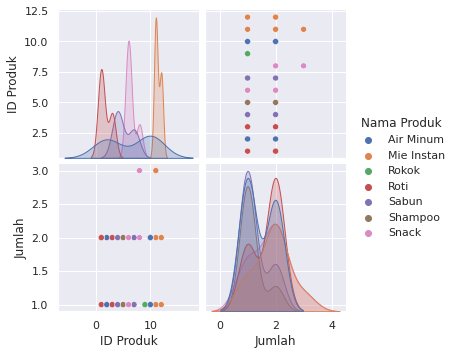

In [ ]:
g = sns.pairplot(df, hue="Nama Produk")

Berdasarkan output diatas terlihat gambaran umum pada variabel nama produk dengan berdasarkan variabel id produk dan jumlah. 

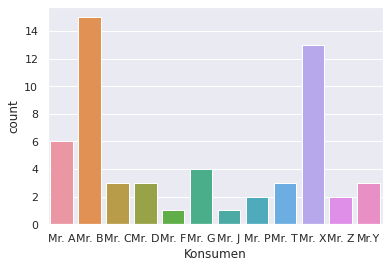

In [ ]:
p = sns.countplot(x = "Konsumen", data = df)

Berdasarkan output di atas terlihat bahwa pelanggan Alfaindo UIN Ciputat yaitu Mr.A sejumlah 6 transaksi, pelanggan potensialnya adalah Mr.B yaitu sejumlah 15 transaksi, pelanggan Mr.C sejumlah 3 transaksi, pelanggan Mr.D sejumlah 3 transaksi, pelanggan dengan jumlah  sementara pelanggan dengan jumlah transaksi paling sedikit adalah Mr.F yaitu sejumlah 1 transaksi, lalu pelanggan Mr.G sejumlah 4 transaksi, pelanggan Mr.J sejumlah 1 transaksi, pelanggan Mr.P sejumlah 2 transaksi, pelanggan Mr. T sejumlah 3 transaksi, pelanggan Mr. X sejumlah 13 transaksi, pelanggan Mr. Z sejumlah 2 transaksi, dan pelanggan Mr. Y sejumlah 3 transaksi.

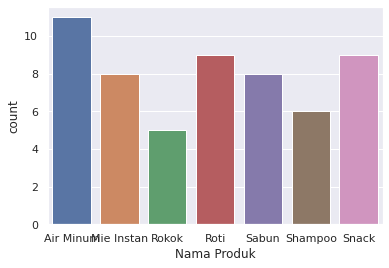

In [ ]:
p = sns.countplot(x = "Nama Produk", data = df)

Berdasarkan output di atas terlihat bahwa produk yang paling banyak terjual adalah Air Minum dengan total penjualannya sejumlah 11 sementara produk yang paling sedikit terjual adalah rokok dengan total penjualannya sejumlah 5. Penjualan Produk Mie Instant dan Sabun sama yaitu sejumlah 8 Produk.
Penjualan Produk Roti dan Snack sama yaitu sejumlah 9 Produk.


In [ ]:
CT = pd.crosstab(index=df['Nama Produk'], columns=df['Merek'])
CT

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
Nama Produk,,,,,,,,,,,,
Air Minum,5,0,0,0,0,0,0,0,0,0,6,0
Mie Instan,0,0,0,0,5,0,0,0,3,0,0,0
Rokok,0,0,0,0,0,0,0,5,0,0,0,0
Roti,0,0,0,0,0,0,0,0,0,3,0,6
Sabun,0,0,0,0,0,5,3,0,0,0,0,0
Shampoo,0,0,0,6,0,0,0,0,0,0,0,0
Snack,0,7,2,0,0,0,0,0,0,0,0,0


Berdasarkan output di atas terlihat bahwa produk air minum yang paling banyak terjual adalah merek sprit sejumlah 6, lalu untuk produk mie instan yang paling banyak terjual adalah merek indomie sejumlah 5, untuk produk rokok yang paling banyak terjual adalah merek malioboro sejumlah 5, untuk produk roti yang paling  terjual adalah merek sri roti sejumlah 6, untuk produk sabun yang paling banyak terjual adalah merek lifboy sejumlah 5, untuk produk shampoo yang paling banyak terjual adalah merek clean sejumlah 6, dan untuk produk snack yang paling banyak adalah merek chiki sejumlah 7.

# Market Basket Analisis

In [ ]:
df.to_csv("https://raw.githubusercontent.com/yogaap113/Case-Study-03-Data-Mining-UIN-Ganjil-2022-Kelompok-1/main/Kasus-AR-MBA-Ganjil-2022-UIN.csv", encoding='utf8', index=False)
'Done'

'Done'

In [ ]:
print(set(df['Konsumen']))

{'Mr.Y', 'Mr. D', 'Mr. Z', 'Mr. A', 'Mr. X', 'Mr. C', 'Mr. G', 'Mr. B', 'Mr. T', 'Mr. F', 'Mr. J', 'Mr. P'}


In [ ]:
df_A = df[df['Konsumen'] =="Mr. B"]
df_A.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2,2022-07-02,Mr. B,6,Snack,Chiki,2
6,2,2022-07-03,Mr. B,3,Roti,Prambanan,1
7,2,2022-07-04,Mr. B,5,Shampoo,Clean,1
11,4,2022-07-02,Mr. B,1,Roti,Sri Roti,2


In [ ]:
basket = df

In [ ]:
# Transaksi Group
basket = basket.groupby(['ID Transaksi', 'Merek'])['Jumlah']
basket.head()

0     2
1     1
2     2
3     1
4     1
5     2
6     1
7     1
8     1
9     1
10    1
11    2
12    2
13    3
14    1
15    2
16    1
17    2
18    2
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    3
27    2
28    1
29    1
30    2
31    1
32    2
33    1
34    2
35    2
36    2
37    1
38    2
39    1
40    2
41    1
42    1
43    2
44    1
45    2
46    2
47    1
48    1
49    2
50    2
51    1
52    1
53    2
54    2
55    2
Name: Jumlah, dtype: int64

In [ ]:
# Jumlahkan, unstack, Null=0, index baris menggunakan Nomer Invoice
basket = basket.sum().unstack().reset_index().fillna(0).set_index('ID Transaksi')
basket.head()


Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,2,0,0,0,1,0,0,2
10,0,2,0,0,0,0,0,0,0,1,2,0
11,0,0,0,0,0,0,0,1,0,2,0,0
12,0,0,0,1,1,2,0,0,2,0,0,0
13,0,0,2,0,0,0,0,0,0,0,1,1


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units) # one-hot encoding
basket_sets.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
10,0,1,0,0,0,0,0,0,0,1,1,0
11,0,0,0,0,0,0,0,1,0,1,0,0
12,0,0,0,1,1,1,0,0,1,0,0,0
13,0,0,1,0,0,0,0,0,0,0,1,1


In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
1,0.388889,(Chiki)
3,0.333333,(Clean)
10,0.333333,(Sprit)
11,0.333333,(Sri Roti)
0,0.277778,(Aquos)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
7,0.277778,(Malioboro)
16,0.166667,"(Clean, Chiki)"
28,0.166667,"(Lifboy, Indomi)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
95,"(Chiki, Sri Roti)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
27,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
99,"(Sri Roti, Aquos)","(Chiki, Lifboy)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
97,"(Sri Roti, Lifboy)","(Chiki, Aquos)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf


Berdasarkan output di atas dapat kita lihat bahwa dari 104 data transaksi penjualan terlihat lift tertinggi adalah 9 yaitu (Lifboy, Aquos) dan (Chiki, Sri Roti) yang artinya ketika konsumen membeli Lifboy dan Aquos maka membeli pula Chiki dan Sri Roti atau bisa dikatakan juga banyak konsumen yang ketika membeli Lifboy dan Aquos maka membeli pula Chiki dan Sri Roti dibanding konsumen membelinya secara terpisah. Hal tersebut berarti semakin banyak orang membeli Lifboy dan Aquos makan semakin banyak pula orang membeli  Chiki dan Sri Roti.

In [ ]:
# Filtering
rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,"(Lifboy, Aquos)","(Chiki, Sri Roti)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
95,"(Chiki, Sri Roti)","(Lifboy, Aquos)",0.111111,0.111111,0.111111,1.0,9.0,0.098765,inf
27,(Citata),"(Sprit, Sri Roti)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
97,"(Sri Roti, Lifboy)","(Chiki, Aquos)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
94,"(Chiki, Lifboy)","(Sri Roti, Aquos)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf


Berdasarkan output diatas dapat kita lihat bahwa dari hasil dengan lift lebih besar dari 6 dan conidence lebih besar atau sama dengan 0.8 adalah liftboy, aquos, chiki, sriroti, sebaliknya, lalu ada citata dan sprit, sri roti.

#Kesimpulan dan saran


Berdasarkan hasil analisis, maka:
1. Pelanggan potensial dari AlfaIndo adalah Mr. B. Rekomendasi dari kami adalah Toko AlfaIndo perlu membuat sistem mamber ship. Dengan memberi discount kepada konsumen yang mengajak konsumen lain berbelanja di toko tersebut dengan minimal belanja tertentu. Bisa juga dengan menggunakan kode referal jadi jika ada konsumen A yang berbelanja menggunakan kode referal konsumen B. Maka keduanya akan mendapatkan discount.
2. Produk yang paling banyak terjual adalah Air Minum dan paling sedikit adalah rokok. Kami mengasumsikan hal tersebut terjadi karena pasca pandemi banyak dari konsumen yang menjadi lebih peduli akan kesehatan.Terlebih lagi banyak orang yang pernah terkena covid dimana berarti paru-parunya menjadi tidak sehat. Sehingga mereka memilih untuk tidak membeli rokok dan justru memilih untuk minum banyak air putih. Rekomendasi dari kami adalah dengan mengadakan promo tebus rokok murah jika mencapai jumlah minimal belanja. Dengan harapan sisa stok rokok yang belum terljual dapat habis terjual. 
3. Mayoritas konsumen lebih suka Indomie dibanding Mi Sedap. Agar penjualan tidak makin merugi karena mie tidak terjual karena kadaluarsa. Maka kami merekomendasikan untuk mengadakan promo buy two get one free. Dengan harapan orang yang sangat mempertimbangkan harga terkhusus ibu-ibu akan memilih untuk membeli mie sedap. Dan orang yang mempertimbangkan rasa akan tetap membeli Indomie. Dengan begitu penjualan akan menjadi seimbang dan omset akan naik.

Berdasarkan hasil analisis yang telah kami lakukan, kami merekomendasikan Toko Alfalndo Cabang UIN Ciputat